# Homework 2 (KNN)

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart health:

- age           : The person's age in years
- sex           : The person's sex (1 = male, 0 = female)
- cp            : The chest pain experienced (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trtbps        : The person's resting blood pressure (mm Hg on admission to the hospital)
- chol          : The person's cholesterol measurement in mg/dl
- fbs           : The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg       : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- hr            : The person's maximum heart rate achieved
- exng          : Exercise induced angina (1 = yes; 0 = no)
- oldpeak       : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
- slope         : the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- vessels       : The number of major vessels (0 - 4)
- thal          : A blood disorder called thalassemia (0 = normal, 1 = fixed defect, 2 = reversable defect, 3 = unreversable defect)
- heart_disease : Heart disease (0 = no, 1 = yes)


Many of the features come from Electrocardiogram Tests (ECG/EKG), where the electrical rhythms of the heart are measured. Here's an example of an ECG reading:


![ECG Example](ecg.jpg)



### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict whether an incoming patient is likely to have heart disease or not

In this assignment, we will be using K-nearest-neighbors as the classifier

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW2.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [57]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [58]:
# Put code here to reproduce the below output, or something similar
# Load the data into pandas DataFrame
heart_df = pd.read_csv('data_hw2.csv')

# Call .head() to return first 5 data
heart_df.head()

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
# call .tail() to return last 5 data
heart_df.tail()

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall,heart_disease
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

There are 303 patients because the data set has 0 - 302 rows, which we have 303 patients.

First, we want to get our data ready for analysis.

__Q2:__ The categorical variables in the data set are already encoded, but which features would be considered categorical? (I counted 9, including the dependent variable)

The 9 categorical variables are sex, cp, fbs, restecg, exng, slope, vessels, thall, and heart_diesase.

__Q3:__ How might categorical variables affect a KNN classifier?

It depends because category variables that are binary should be okay to work with KNN model. If it is not binary then it will be challenging to compute the distance with numerical variable which values range can be like from 0 to 100. And then the distance of the numerical variable will outnumber of the category variables in terms of prediction. So, we will need to create dummy variables out of category variables. Also, create k dummies and not k - 1 dummies.

Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Once again, look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function to make it readable. Remember, we want the colors to immediately pop out and tell us what's happening without having to read the numbers. It's much easier to see color differences than read a table of numbers. The job of a data scientist is to make data understandable.

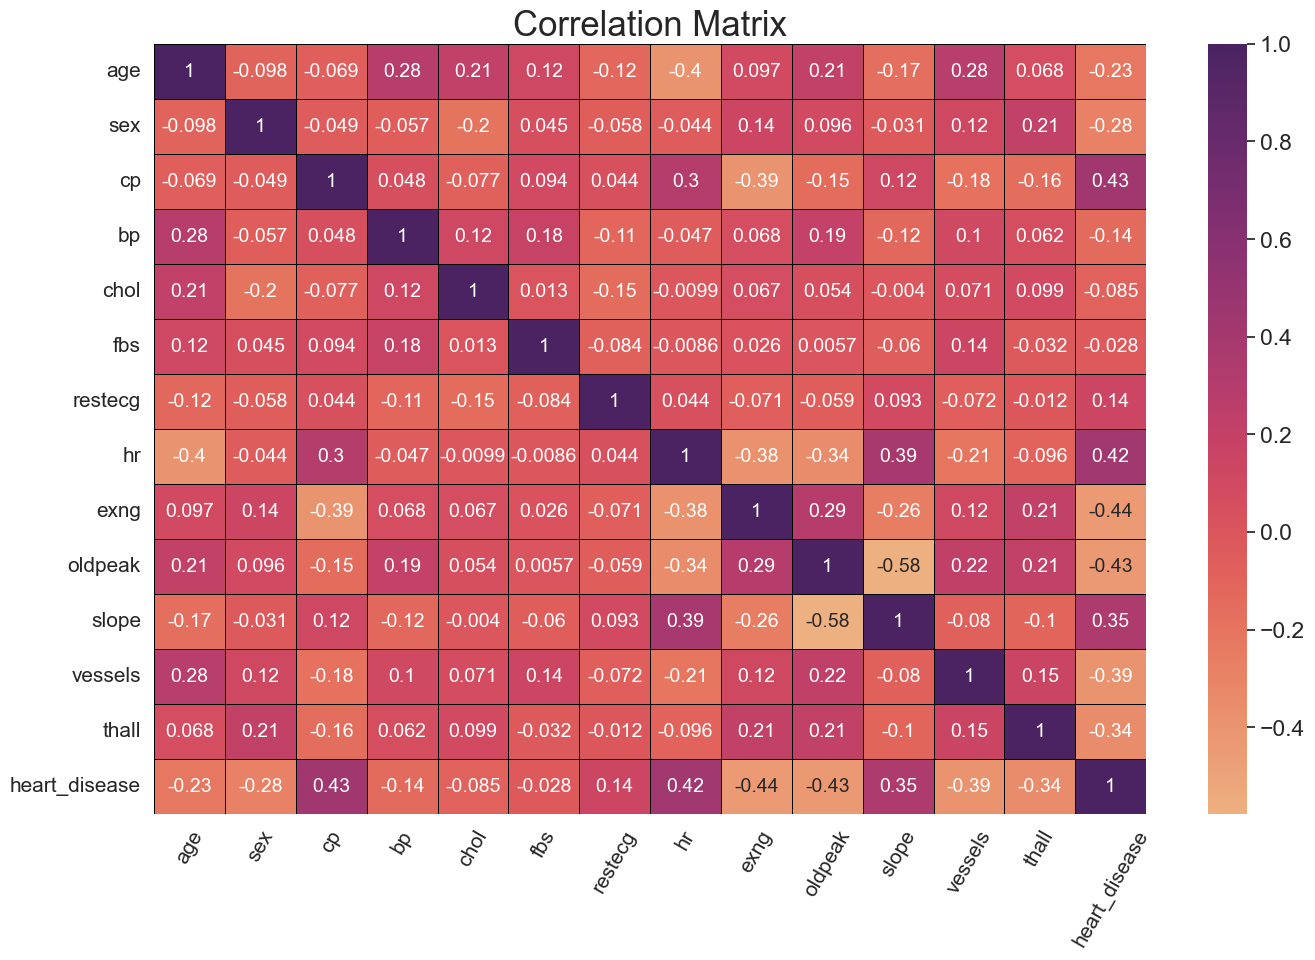

In [60]:
# Put code here to reproduce the below output, or something similar
# Make the figsize larger to make it easier to read
plt.figure(figsize = (16, 10))

# Create the correlation matrix by using Pandas
corr_mat = heart_df.corr()

# Plot a heatmap by using seaborn
sns.heatmap(corr_mat, annot = True, annot_kws = {'size':14}, cmap = 'flare', linewidths = 0.7, linecolor = "black")
sns.set(font_scale = 1.5)
plt.title('Correlation Matrix', fontsize = 25)
plt.xticks(fontsize = 15, rotation = 60)
plt.yticks(fontsize = 15)
plt.show()

__Q4:__ What sticks out from the heatmap, and what does it tell us about our data, especially heart disease?

After looking at the correlation matrix, I see no severe collinearity because there are no correlation with more than 0.8 between 2 variables. I see patients with high chestpain (cp) tend to have the highest chance of having heart disease. Furthermore, I see patients with low oldpeak tend to have the lowest slope. There are many relationships are pretty close to correlation of 0. I also see another thing that sticks out from this heatmap is patient with heart disease have over +/-0.40 correlation with cp, hr, exng, and oldpeak.

__Q5:__ Do you think this correlation matrix is affected at all by the fact that heart_disease is a categorical variable?

More on [understanding correlation](https://www.mathsisfun.com/data/correlation.html)

Yes because we have 4 variables that had over +/-0.40 correlation with heart_disease.

We have mostly categorical variables in this data set, and on top of that, we are not medical experts, so the exact definition of some features may not be obvious to us. How can we better understand the data like this?

With something like this, I like using [Seaborn violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html), because they are very intuitive.

In my correlation plot, there were 4 variables that had > +/- 0.40 correlation with heart_disease:
- cp
- hr
- exng
- oldpeak

So, let's look at those. Try using a violin plot to create the following images. The features are labeled on the x and y axis. As a tip, make sure the following are included in your function call,

```hue = 'heart_disease'```

```split = True```

Check out the above link to see the documentation for violin plots if you have any questions, or use Google :)

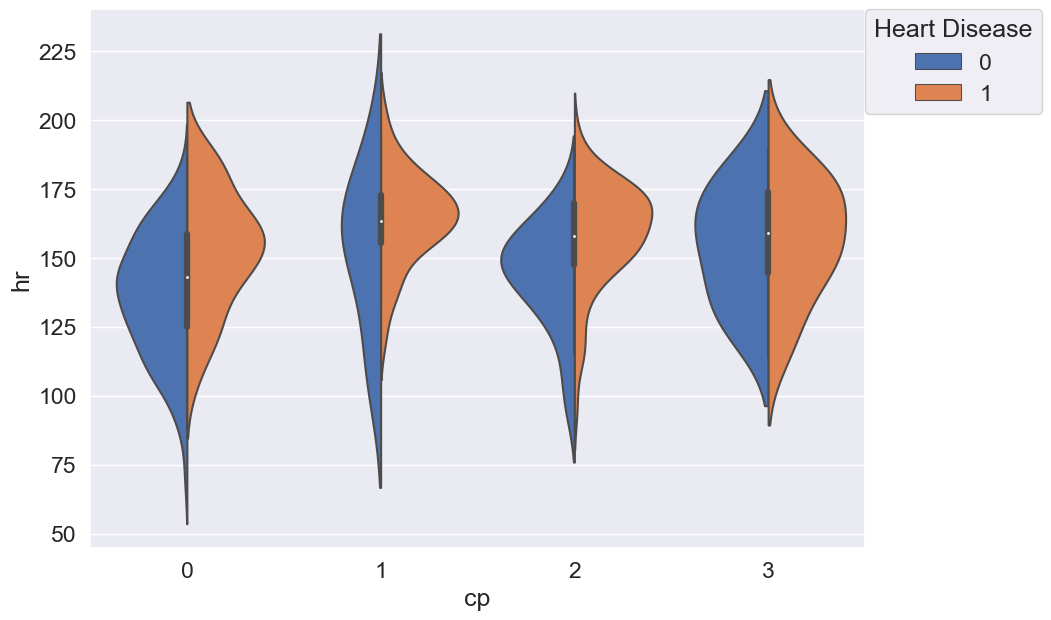

In [61]:
### Put code here to reproduce the below output
# change figsize back to (10, 7)
plt.figure(figsize = (10, 7))

# Create a violin plots using seaborn
sns.violinplot(data = heart_df, x = heart_df['cp'], y = heart_df['hr'],
               hue = heart_df['heart_disease'], split = True, saturation = 1)

# Put the legend outside of the plot due to overlapping which is harder to read
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0, title = 'Heart Disease')

__Q6:__ What can we learn from the above plot about the relations between the 3 features?

Chest pain level 0 and 1 from patient with no heart disease have a long-tail distribution below the first quartile. Chest pain level 0 have the median value at heart rate between 125 and 150. On the other hand, the median value for chest pain level 1 to 3 is at heart rate between 150 and 175. Chest pain 3 seem to have an even distribution between of having heart disease or not based on the maximum heart rate.

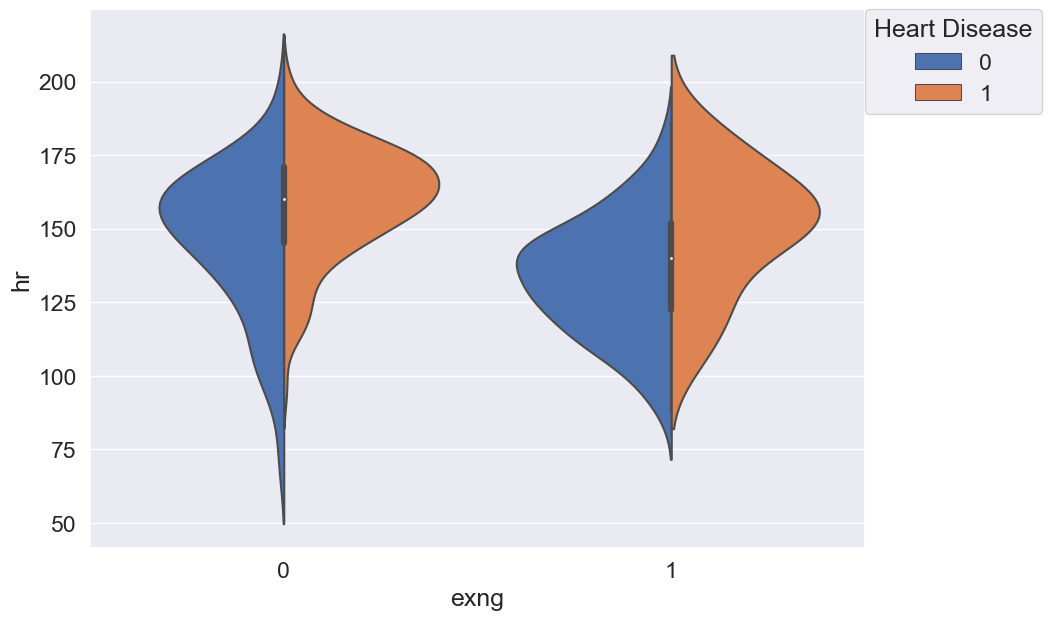

In [62]:
### Put code here to reproduce the below output
# Create a violin plots using seaborn
sns.violinplot(data = heart_df, x = heart_df['exng'], y = heart_df['hr'],
               hue = heart_df['heart_disease'], split = True, saturation = 1)

# Put the legend outside of the plot due to overlapping which is harder to read
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0, title = 'Heart Disease')

__Q7:__ What can we learn from the above plot about the relations between the 3 features?

The 0 exng (no excercise induced angina) from patients do not have heart disease have a long-tail distribution and lowest probability is at heart rate (hr) maximum of 50. The 0 exng from both patients that do not and do have heart disease have high probability at heart rate range of 150 to 175. The 1 exng from patients do not have heart disease have the peak of high probability between 125 and 150 heart rate maximum. On the other hand, patients that have heart disease have high probability around 155 heart rate maximum. 

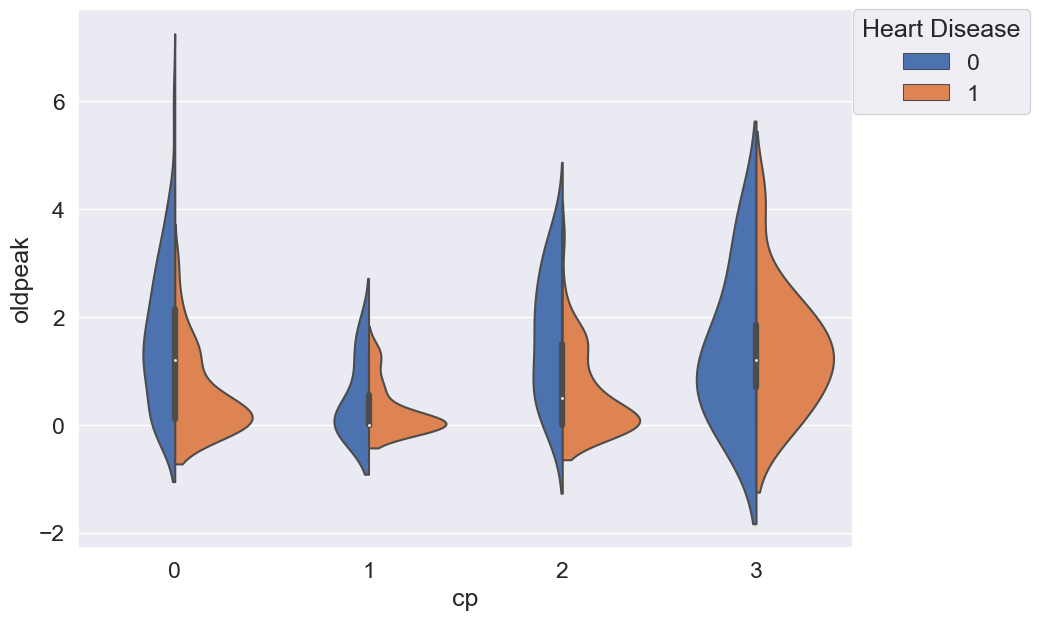

In [63]:
### Put code here to reproduce the below output
# Create a violin plots using seaborn
sns.violinplot(data = heart_df, x = heart_df['cp'], y = heart_df['oldpeak'],
               hue = heart_df['heart_disease'], split = True, saturation = 1)

# Put the legend outside of the plot due to overlapping which is harder to read
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0, title = 'Heart Disease')

__Q8:__ What can we learn from the above plot about the relations between the 3 features?

Chest pain level 0 have a huge long-tail distribution above the third quartile where patients that do not have heart disease. Chest pain level 0, 1, and 2 from patients that do have heart disease seem to have high probability at oldpeak is 0. However, the median for each chest pain levels are around oldpeak from 0 to 2.

<AxesSubplot:xlabel='exng', ylabel='oldpeak'>

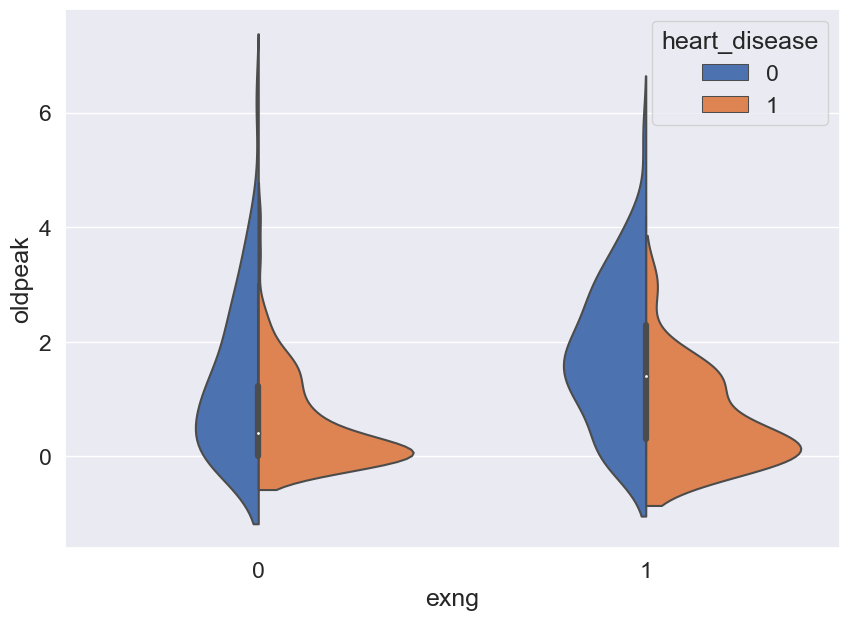

In [64]:
### Put code here to reproduce the below output
# Create a violin plots using seaborn
sns.violinplot(data = heart_df, x = heart_df['exng'], y = heart_df['oldpeak'],
               hue = heart_df['heart_disease'], split = True, saturation = 1)

__Q9:__ What can we learn from the above plot about the relations between the 3 features?

Both exng 0 and 1 from patients do no have heart disease have a long-tail above the third quartile. Patients that have heart disease have high probability at oldpeak is 0. The exng 1 have a higher median value than exng 0. 

As we can see, using violin plots is a unique and cool way to visualize and help us to comprehend how different features are interacting with one another in our data set. There are many other ways to do it, but being able to understand the data set you have is a really important part of any data science project. Visual representations are also super helpful for our brains to help us intuitively understand the data.

### Part 2: KNN Analysis

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, HW1, the lecture notes, or the just google the specific function to see how to use it.

First, let's split and then scale the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [65]:
### Put code here to reproduce the below output or something similar
# Create X variable and include all columns but dropping "heart_disease"
X = heart_df.drop('heart_disease', axis = 1)

# Create y variable and let it be the "heart_disease"
y = heart_df['heart_disease']

# Create our scalar object
mmScaler = MinMaxScaler()

# Use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = mmScaler.fit_transform(X)

# Reassign X to a new DataFrame using the X_scaled values
X = pd.DataFrame(data = X_scaled, columns = X.columns)

# Split data into training and testing
# Set test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Call .head()
X.head(118)

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.291667,1.0,0.000000,0.150943,0.194064,0.0,0.5,0.687023,0.0,0.000000,1.0,0.0,1.000000
114,0.541667,1.0,0.333333,0.339623,0.310502,0.0,0.5,0.641221,0.0,0.000000,1.0,0.0,0.666667
115,0.166667,0.0,0.666667,0.245283,0.203196,0.0,0.5,0.755725,0.0,0.000000,1.0,0.0,0.666667
116,0.250000,1.0,0.666667,0.339623,0.200913,0.0,0.0,0.740458,0.0,0.322581,0.5,0.0,0.666667


__Q10:__ What test_size did you decide to use?

I am using 0.3 for test_size which is 30% of it and 70% to training.

Now, we want to actually run the KNN analysis. Using KNeighborsClassifier and a for loop, run KNN using different values of k, from 2 -> 25. Print them out as they are run.

Make sure to save the accuracies in a list or array, as they will be used later.

In [66]:
### Put code here to reproduce the below output or something similar
# Will append scores here for plotting later
k_values = []
accuracies = []

# Testing k values from 2 - 25
for i in range(2, 26):
    # Create a model with k = i
    knn = KNeighborsClassifier(n_neighbors = i)
    
    # Train the model by fitting
    knn.fit(X_train, y_train)
    
    # Calculate the accuracy score on testing
    accuracy_score = knn.score(X_test, y_test)
    
    # Store each i in k_values
    k_values.append(i)
    
    # Store the accuracy scores in accuracies
    accuracies.append(accuracy_score)
    
    # Print the output
    print(f"k = {i}, accuracy = {accuracy_score}")

k = 2, accuracy = 0.7362637362637363
k = 3, accuracy = 0.7692307692307693
k = 4, accuracy = 0.7692307692307693
k = 5, accuracy = 0.7692307692307693
k = 6, accuracy = 0.7692307692307693
k = 7, accuracy = 0.7692307692307693
k = 8, accuracy = 0.7802197802197802
k = 9, accuracy = 0.7692307692307693
k = 10, accuracy = 0.7582417582417582
k = 11, accuracy = 0.7692307692307693
k = 12, accuracy = 0.7802197802197802
k = 13, accuracy = 0.7802197802197802
k = 14, accuracy = 0.7582417582417582
k = 15, accuracy = 0.7692307692307693
k = 16, accuracy = 0.7912087912087912
k = 17, accuracy = 0.7692307692307693
k = 18, accuracy = 0.7802197802197802
k = 19, accuracy = 0.7472527472527473
k = 20, accuracy = 0.7582417582417582
k = 21, accuracy = 0.7582417582417582
k = 22, accuracy = 0.7472527472527473
k = 23, accuracy = 0.7362637362637363
k = 24, accuracy = 0.7472527472527473
k = 25, accuracy = 0.7472527472527473


Now, do the same thing as above, but try using a different distance function (try 'cosine') as part of the KNearestNeighbors function.

In [67]:
### Put code here to reproduce the below output or something similar
# Will append scores here for plotting later
accuracies_cos = []

# Testing k values from 2 - 25
for i in range(2, 26):
    # This time we add metric = 'cosine'
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'cosine')
    
    # Train the model by fitting
    knn.fit(X_train, y_train)
    
    # Calculate the accuracy score on testing
    accuracy_cos_score = knn.score(X_test, y_test)
    
    # Store the cosine accuracy scores in accuracies_cos
    accuracies_cos.append(accuracy_cos_score)
    
    # Print the output
    print(f"k = {i}, accuracy = {accuracy_cos_score}")

k = 2, accuracy = 0.7692307692307693
k = 3, accuracy = 0.7692307692307693
k = 4, accuracy = 0.7802197802197802
k = 5, accuracy = 0.7802197802197802
k = 6, accuracy = 0.7582417582417582
k = 7, accuracy = 0.7692307692307693
k = 8, accuracy = 0.7802197802197802
k = 9, accuracy = 0.7912087912087912
k = 10, accuracy = 0.7912087912087912
k = 11, accuracy = 0.7802197802197802
k = 12, accuracy = 0.7692307692307693
k = 13, accuracy = 0.7582417582417582
k = 14, accuracy = 0.7582417582417582
k = 15, accuracy = 0.7692307692307693
k = 16, accuracy = 0.7912087912087912
k = 17, accuracy = 0.7692307692307693
k = 18, accuracy = 0.7912087912087912
k = 19, accuracy = 0.7802197802197802
k = 20, accuracy = 0.7912087912087912
k = 21, accuracy = 0.7802197802197802
k = 22, accuracy = 0.7912087912087912
k = 23, accuracy = 0.7582417582417582
k = 24, accuracy = 0.7692307692307693
k = 25, accuracy = 0.7582417582417582


Finally, choose your own distance function from the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics). Make sure to save these accuracies as well

In [68]:
### Put code here to reproduce the below output or something similar
# I choose to use the manhattan for my distance function

# Will append scores here for plotting later
accuracies_manh = []

# Testing k values from 2 - 25
for i in range(2, 26):
    # Adding metric = 'manhattan'
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
    
    # Train the model by fitting
    knn.fit(X_train, y_train)
    
    # Calculate the accuracy score on testing
    accuracy_manh_score = knn.score(X_test, y_test)
    
    # Store the accuracy scores in accuracies
    accuracies_manh.append(accuracy_manh_score)
    
    # Print the output
    print(f"k = {i}, accuracy = {accuracy_manh_score}")

k = 2, accuracy = 0.7692307692307693
k = 3, accuracy = 0.8131868131868132
k = 4, accuracy = 0.8131868131868132
k = 5, accuracy = 0.8131868131868132
k = 6, accuracy = 0.8131868131868132
k = 7, accuracy = 0.8021978021978022
k = 8, accuracy = 0.8131868131868132
k = 9, accuracy = 0.8351648351648352
k = 10, accuracy = 0.8351648351648352
k = 11, accuracy = 0.8571428571428571
k = 12, accuracy = 0.8571428571428571
k = 13, accuracy = 0.8241758241758241
k = 14, accuracy = 0.8461538461538461
k = 15, accuracy = 0.8351648351648352
k = 16, accuracy = 0.8461538461538461
k = 17, accuracy = 0.8461538461538461
k = 18, accuracy = 0.8461538461538461
k = 19, accuracy = 0.8351648351648352
k = 20, accuracy = 0.8351648351648352
k = 21, accuracy = 0.8351648351648352
k = 22, accuracy = 0.8791208791208791
k = 23, accuracy = 0.8351648351648352
k = 24, accuracy = 0.8461538461538461
k = 25, accuracy = 0.8461538461538461


Now, plot the three different accuracies using SeaBorn lineplots on a single graph/ax. The first line has been added to help you begin. Not all the details have to be shown as the one below, but the graph should still make sense and be readable. You also might use a different distance metric for the 2nd and 3rd models, so it's okay if that's different.

If you want to learn more about how Seaborn/Matplotlib graphs work, check out the documentation.

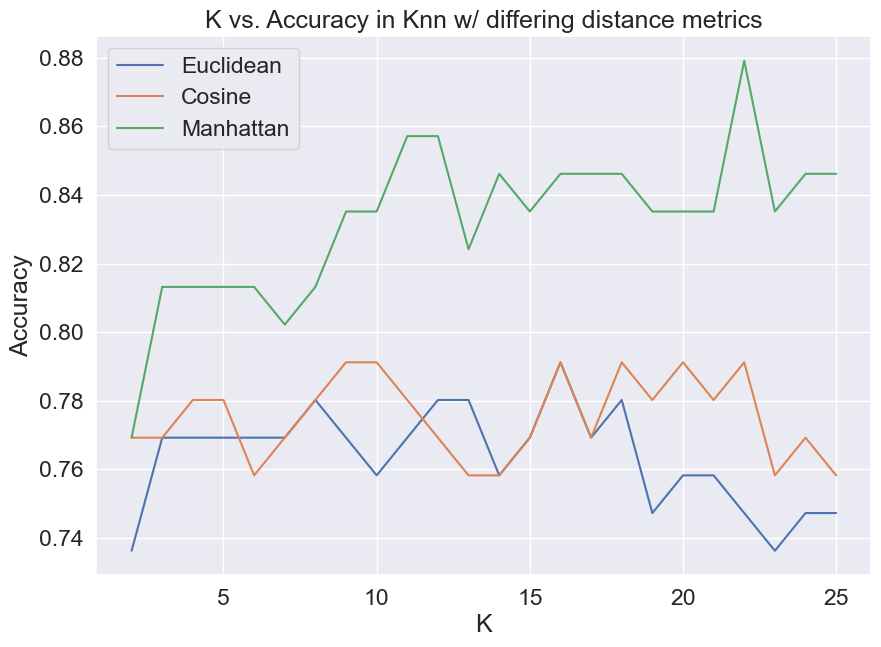

In [69]:
### Put code here to reproduce the below output or something similar
# Create lineplot using seaborn
# Create a line for the accuracies of 'Euclidean'
sns.lineplot(x = range(2, 26), y = accuracies, label = 'Euclidean')
# Create a line for the accuracies of 'cosine'
sns.lineplot(x = range(2, 26), y = accuracies_cos, label = 'Cosine')
# Create a line for the accuracies of 'Manhattan'
sns.lineplot(x = range(2, 26), y = accuracies_manh, label = 'Manhattan')
plt.title('K vs. Accuracy in Knn w/ differing distance metrics')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

__Q11:__ Which distance function worked best for you? What do you think the benefit of using different distance functions might be? 

The manhattan distance worked the best for me. The benefit of using different distance function is to determine which of them is best and appropriate to use for specific problem. In this manner, we can improve the accuracy of our predictive algorithms and make sure they are suitable for the given data.

Do any another analysis you see fit or are curious about. Extra work is often rewarded with bonus points!

In [70]:
# Lets try using cityblock distance function
# Will append scores here for plotting later
accuracies_block = []
train_scores = []

# Testing k values from 2 - 25
for i in range(2, 26):
    # This time we add metric = 'cityblock'
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'cityblock')
    
    # Train the model by fitting
    knn.fit(X_train, y_train)
    
    # Calculate the accuracy score on testing
    accuracy_block_score = knn.score(X_test, y_test)
    
    # Store the cosine accuracy scores in accuracies_cos
    accuracies_block.append(accuracy_block_score)
    
    # Also store the scores from train set
    train_scores.append(knn.score(X_train, y_train))
    
    # Print the output
    print(f"k = {i}, accuracy = {accuracy_block_score}")
    


k = 2, accuracy = 0.7692307692307693
k = 3, accuracy = 0.8131868131868132
k = 4, accuracy = 0.8131868131868132
k = 5, accuracy = 0.8131868131868132
k = 6, accuracy = 0.8131868131868132
k = 7, accuracy = 0.8021978021978022
k = 8, accuracy = 0.8131868131868132
k = 9, accuracy = 0.8351648351648352
k = 10, accuracy = 0.8351648351648352
k = 11, accuracy = 0.8571428571428571
k = 12, accuracy = 0.8571428571428571
k = 13, accuracy = 0.8241758241758241
k = 14, accuracy = 0.8461538461538461
k = 15, accuracy = 0.8351648351648352
k = 16, accuracy = 0.8461538461538461
k = 17, accuracy = 0.8461538461538461
k = 18, accuracy = 0.8461538461538461
k = 19, accuracy = 0.8351648351648352
k = 20, accuracy = 0.8351648351648352
k = 21, accuracy = 0.8351648351648352
k = 22, accuracy = 0.8791208791208791
k = 23, accuracy = 0.8351648351648352
k = 24, accuracy = 0.8461538461538461
k = 25, accuracy = 0.8461538461538461


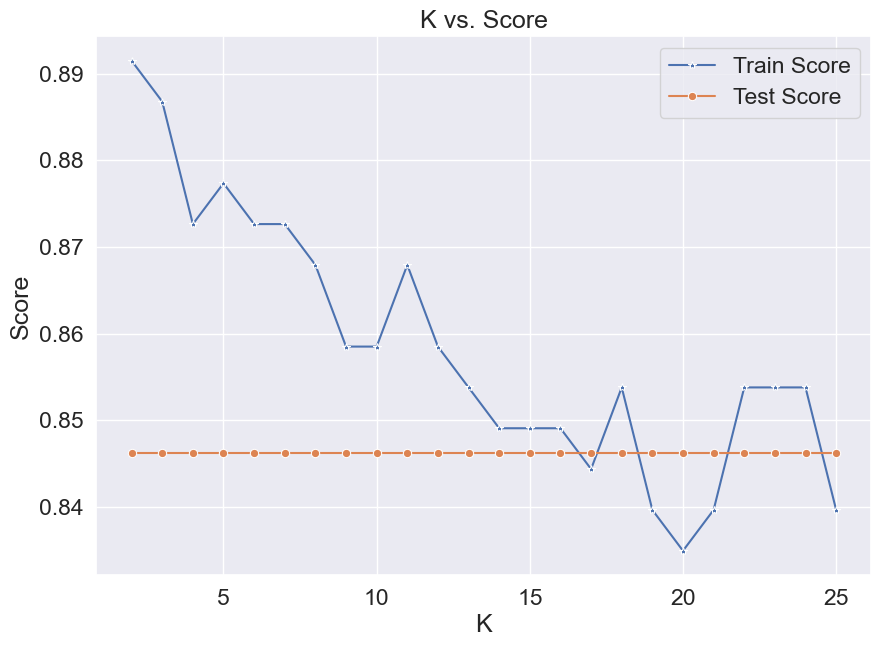

In [71]:
# Create a line plot of K vs. Score.
# Just to visualize from both train and test score as k values increase 
sns.lineplot(x = range(2,26), y = train_scores, marker='*', label = 'Train Score')
sns.lineplot(x = range(2,26), y = accuracy_block_score, marker='o', label = 'Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [72]:
# Lets create a confusion matrix
# Importing confusion matrix
from sklearn.metrics import confusion_matrix

# Prediction
y_pred = knn.predict(X_test)

# print the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[31  8]
 [ 6 46]]


Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

As a Data Scientist, I got contacted by a research team of cardiologists to try and understand their group of patients. They want to know to predict whether an incoming patient is likely to have heart disease or not. However, they need help and this is where I come in. I looked at their data collected from previous 303 patients with 14 different attributes. Since the research team wants to know whether an incoming patient is likely to have heart disease or not, requires highly accurate prediction. So, I chose K-Nearest-Neighbors (KNN) which handles with high accuracy. Before going straight into KNN analysis, I did the visual analysis of the data set. I used the heatmap of the correlation matrix to see every relationship between two variables and check if there was any severe collinearity. Based on the correlation matrix, we have patients with high chest pain and high maximum heart rate who tend to have a high chance of having heart disease. Also, we have patients with low oldpeak and low exng tend to have a low chance of having heart disease. I plot some violin plots on 4 variables that had over +/-0.40 correlation with heart_disease to get a better understanding of these data. The violin plot of cp vs. hr shows that all chest pain levels with the patient have heart disease had a maximum heart rate between 150 to 175. Cp vs. oldpeak shows that each chest pain levels have a low old peak with a median value range of around 0 - 2. Also, the exng vs. old peak plot showed us that patients that have heart disease are mostly at oldpeak 0. All of these violin plots do show us some have long-tail distribution below the first quartile and some have a long tail above the third quartile. 

Furthermore, the KNN analysis is where I find the accuracy of the data. First, I split and scale the data using the MinMaxScaler. I decided to use 30% in testing, which will use 90 data points for testing and the rest in training. Then I ran the KNN analysis, where I used k values from 2 to 25 and calculate the accuracy for each k value. So, I used three different distance function, which is euclidean, cosine, and manhattan. Then I plot them into a line plot to compare and visualize the accuracy of each distance function. I have the manhattan distance function as my best function than the other two because the accuracy is far better and is the higher percentage for every k value. However, the euclidean and the cosine distance function are still good to use, but their accuracy score could be weak. It will give the research team a hard time predicting whether an incoming patient is likely to have heart disease or not. Also, the stakeholder will probably not understand how accurate the data is. So, KNN analysis with manhattan distance is probably the best function to use because, in the long term as K values increase, the accuracy increases. It keeps the accuracy stable in predicting patients that have heart disease or not. This is good news for the research team and the stakeholders, which they will understand much better than using euclidean and cosine distance functions.